<a href="https://colab.research.google.com/github/PaulaDCV/IMDB_Analysis/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Investigating IMDB movies.

This project looks at the IMDB dataset and analyses different variables to try and find out what is needed to produce a movie which will obtain good returns.
The IMDB dataset consists of a list of films with information about each one of them, from technical details ,such as their director, budget, year it was released etc, to other details such as facebook likes of the directors and actors.

In [ ]:

myfile='movie_metadata.csv'

import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import altair
myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)



# Overview of the dataset

To start with I created another column in the data to hold the value for profit, this will show how much a movie has actually made.
Then I removed all entries where the budget used is higher than 1.5 million, as that is our budget and anything over that would not be relevant.

In [ ]:
df["return"] = df["gross"] - df["budget"]
df = df[df["budget"]<1500000]

I looked to see if there are any duplicated entries as this won't help. To check for duplicates I used movie_title and title_year as there may be some movie remakes with the same name but from different years meaning they are not the same movie. I found 6 duplicates, which were then dropped from the dataset.

In [ ]:
dfs = df.duplicated(keep="first")
df[df[["movie_title","title_year"]].duplicated() == True]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,return
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,46700000.0
4532,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,English,USA,R,1000000.0,1980.0,826.0,6.8,2.35,7000,20378000.0
4821,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,46700000.0
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,30775468.0
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377,NaN
4951,Black and White,George A. Romero,284.0,96.0,0.0,56.0,Duane Jones,125.0,NaN,Drama|Horror|Mystery,...,English,USA,Unrated,114000.0,1968.0,108.0,8.0,1.85,0,NaN


In [ ]:
df.drop_duplicates(keep="first")
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,return
count,439.000000,457.000000,458.000000,449.000000,453.000000,2.550000e+02,459.000000,459.000000,457.000000,452.000000,4.590000e+02,458.000000,451.000000,459.000000,352.000000,459.000000,2.550000e+02
mean,72.995444,93.621444,324.556769,188.596882,3154.867550,6.466163e+06,26286.361656,3997.246187,1.129103,128.517699,5.831866e+05,1999.430131,395.170732,6.428976,2.280398,2253.037037,5.875595e+06
std,85.677371,16.339162,1868.433270,227.126676,18310.157249,1.743526e+07,71890.262128,19188.182565,1.667138,267.623577,4.171015e+05,18.624016,1260.595179,1.296691,2.367736,7889.598252,1.744085e+07
min,1.000000,7.000000,0.000000,0.000000,0.000000,7.210000e+02,5.000000,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.900000,1.330000,0.000000,-1.381565e+06
25%,12.500000,86.000000,0.000000,18.000000,159.000000,9.912850e+04,478.000000,268.000000,0.000000,10.000000,2.000000e+05,1997.000000,44.000000,5.800000,1.780000,0.000000,-4.169125e+05
50%,38.000000,92.000000,10.000000,103.000000,472.000000,6.737800e+05,2986.000000,1048.000000,0.000000,39.000000,5.000000e+05,2006.000000,209.000000,6.700000,1.850000,116.000000,2.421720e+05
75%,99.000000,100.000000,86.000000,279.000000,898.000000,3.712270e+06,17769.000000,2164.000000,2.000000,134.250000,1.000000e+06,2012.000000,487.000000,7.300000,1.850000,453.500000,3.147590e+06
max,481.000000,215.000000,17000.000000,2000.000000,260000.000000,1.405301e+08,664719.000000,283939.000000,10.000000,3400.000000,1.455000e+06,2016.000000,21000.000000,8.900000,16.000000,93000.000000,1.404701e+08


I was interested in looking whether a good score would mean good profit. As this is the main objective, if there is a relationship this would mean that movies with higher scores would give good ideas as the movies would give good returns. Therefore I looked at the correlation between both.

In [ ]:
cor_data = df.corr().stack().reset_index().rename(
    columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'})
cor_data['correlation_label'] = cor_data['correlation'].map('{:.2f}'.format)  # Round to 2 decimal
cor_data

<ipython-input-17-265e3e877c16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_data = df.corr().stack().reset_index().rename(


,variable,variable2,correlation,correlation_label
0,num_critic_for_reviews,num_critic_for_reviews,1.000000,1.00
1,num_critic_for_reviews,duration,0.052284,0.05
2,num_critic_for_reviews,director_facebook_likes,0.125141,0.13
3,num_critic_for_reviews,actor_3_facebook_likes,0.100875,0.10
4,num_critic_for_reviews,actor_1_facebook_likes,-0.037461,-0.04
...,...,...,...,...
284,return,actor_2_facebook_likes,0.043638,0.04
285,return,imdb_score,0.082465,0.08
286,return,aspect_ratio,-0.044972,-0.04
287,return,movie_facebook_likes,0.083373,0.08


In [ ]:
import altair as alt
base = alt.Chart(cor_data).encode(
    x=alt.X('variable2:O', title = ""),
    y=alt.Y('variable:O', title = "")
)

# Text layer with correlation labels
# Colors are for easier readability


# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color=alt.Color('correlation:Q', title= "Correlation score")
)

cor_plot  # The '+' means overlaying the text and rect layer

alt.Chart(...)

The correlation is 0.08246457118556813 and the p-value 0.18931082857689951


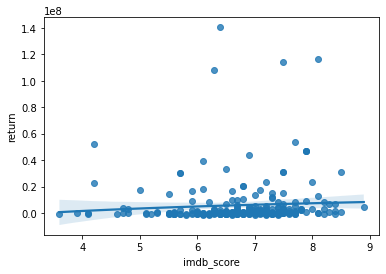

In [ ]:
import seaborn as sns
from scipy import stats
#Calculating correlation
dfCorr= df.dropna(subset=['imdb_score', 'return'])
corr = stats.pearsonr(y=dfCorr["return"], x=dfCorr["imdb_score"])
print("The correlation is",corr[0],"and the p-value", corr[1])

sns.regplot(y=df["return"], x=df["imdb_score"], logx=True)


The correlation coefficient show there was a positive correlation but it was not large enough to be considered, when looking at the p-value it is higher than 0.05, this means we cannot reject the null hypothesis. Therefore we cannot assume a relationship between IMDB score and the returns generated from a film.

The correlation is 0.7126772165004858 and the p-value 7.747998377983452e-41


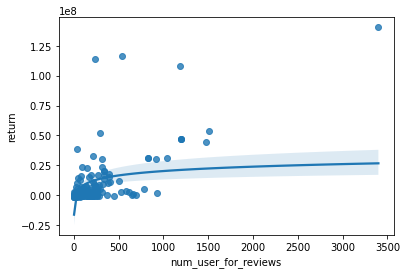

In [ ]:
import seaborn as sns
from scipy import stats
#Calculating correlation
dfCorr= df.dropna(subset=['num_user_for_reviews', 'return'])
corr = stats.pearsonr(y=dfCorr["num_user_for_reviews"], x=dfCorr["return"])
print("The correlation is",corr[0],"and the p-value", corr[1])

sns.regplot(y=df["return"], x=df["num_user_for_reviews"], logx=True)

I decided to explore the relationship between returns and num_user_reviews as well as that had a high correlation value in the table shown previously. This was proved to be true with a p-value of less than 0.05. Therefore it is worth mentioning that user reviews should be encouraged.

#Countries


The next step was looking at different movies and seeing how much they grossed in different countries. To choose the most relavant countries I chose the top 10 with most movies and did a boxplot of the returns obtained from them.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


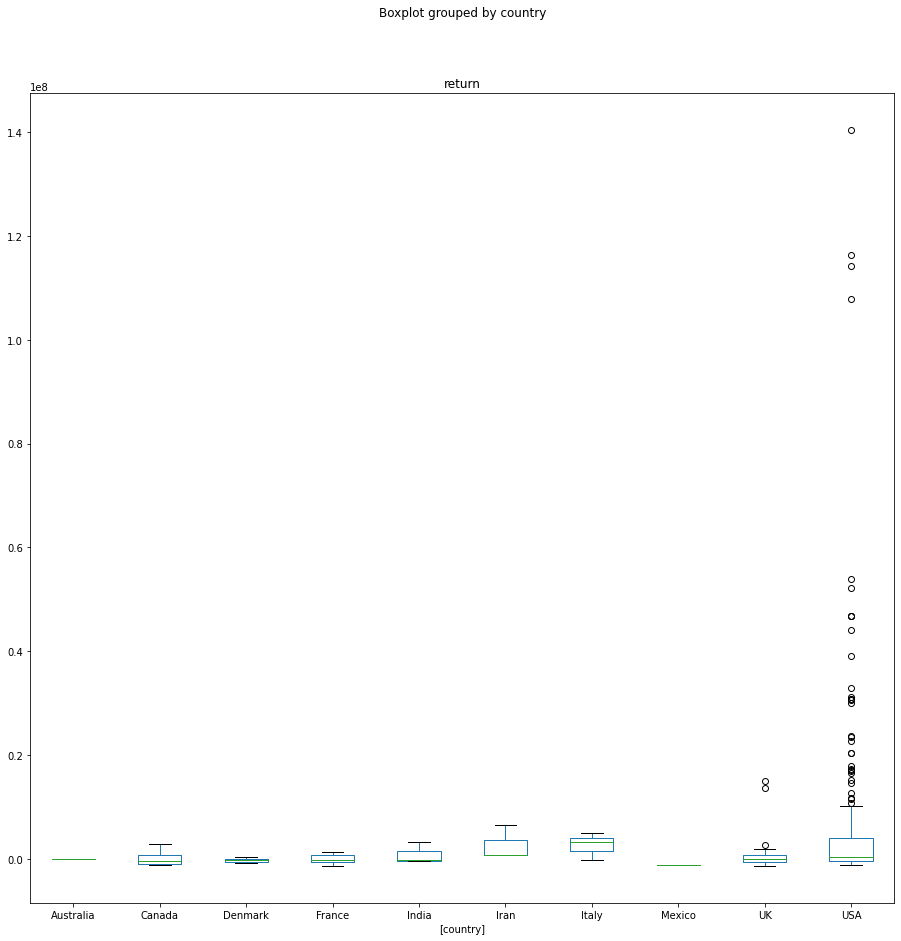

In [ ]:
#Grouping countries to see the number of movies they produced.
movie_counts=df.groupby("country")["movie_title"].count().reset_index('country')
movie_counts.columns = ['country','number of movies']
movie_counts = movie_counts.sort_values('number of movies', ascending=False)
#Keeping top 10 countries with most movies
top_countries = movie_counts["country"][:10]


country_df = df[df.country.isin(top_countries)].loc[:,["country","budget","imdb_score","return","title_year"]]
ax = country_df.boxplot(by=["country"], grid=False, figsize=(15,15), column=["return"] )



Whilst USA seems to have the higher returns, their avearge is not that much more in comparison to other countries with the highest average being Italy. Therefore it could be interesting to look at films made in Italy which have made higher returns.  When looking at Italian films, we see that the sample size is not that big and that the films which produced higher returns were produce in the 1960s and therefore may not be relvant to current times. The two of them were western movies so it could be considered that was a popular genre at the time in Italy.

In [ ]:
df[df["country"]=="Italy"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,return
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,16089,Enzo Petito,3.0,civil war|hitman|outlaw|shootout|spaghetti wes...,http://www.imdb.com/title/tt0060196/?ref_=fn_t...,780.0,Italian,Italy,Approved,1200000.0,1966.0,34.0,8.9,2.35,20000,4900000.0
4525,Color,Joe Marino,9.0,76.0,0.0,0.0,Anella Vastola,12.0,NaN,Horror,Piero Maggiò,The Vatican Exorcisms,332,12,Joe Marino,0.0,NaN,http://www.imdb.com/title/tt3043194/?ref_=fn_t...,10.0,English,Italy,R,1100000.0,2013.0,0.0,2.6,2.35,200,NaN
4682,Color,Bernardo Bertolucci,120.0,106.0,973.0,48.0,Stefania Sandrelli,319.0,NaN,Drama,Jean-Louis Trintignant,The Conformist,17813,500,Dominique Sanda,1.0,fascist|gun|italy|nudity|sexuality,http://www.imdb.com/title/tt0065571/?ref_=fn_t...,101.0,Italian,Italy,R,750000.0,1970.0,90.0,8.1,1.66,0,NaN
4802,Black and White,Lucio Fulci,203.0,82.0,385.0,22.0,David Warbeck,48.0,126387.0,Horror,Catriona MacColl,The Beyond,14985,123,Al Cliver,0.0,doctor|hell|hotel|painter|plumber,http://www.imdb.com/title/tt0082307/?ref_=fn_t...,253.0,Italian,Italy,X,400000.0,1981.0,22.0,6.9,2.35,2000,-273613.0
4897,Color,Sergio Leone,122.0,99.0,0.0,93.0,Gian Maria Volontè,16000.0,3500000.0,Action|Drama|Western,Clint Eastwood,A Fistful of Dollars,147566,16534,Aldo Sambrell,1.0,balladeer|bar|drifter|mexican|revenge,http://www.imdb.com/title/tt0058461/?ref_=fn_t...,235.0,Italian,Italy,R,200000.0,1964.0,360.0,8.0,2.35,0,3300000.0


In [ ]:
df[(df["country"]=="USA" )& (df["title_year"]>2010)&(df["return"]>0)].sort_values(by="return", ascending = False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,return
4545,Color,William Brent Bell,225.0,83.0,19.0,128.0,Claudiu Trandafir,403.0,53245055.0,Horror,Fernanda Andrade,The Devil Inside,30570,988,Brian Johnson,0.0,critically bashed|demonic possession|exorcism|...,http://www.imdb.com/title/tt1560985/?ref_=fn_t...,290.0,English,USA,R,1000000.0,2012.0,169.0,4.2,1.85,12000,52245055.0
4534,Color,Levan Gabriadze,270.0,83.0,6.0,142.0,Renee Olstead,707.0,31537320.0,Horror|Mystery|Thriller,Shelley Hennig,Unfriended,44329,1565,Heather Sossaman,0.0,blender|computer screen|secret|skype|webcam,http://www.imdb.com/title/tt3713166/?ref_=fn_t...,309.0,English,USA,R,1000000.0,2014.0,305.0,5.7,1.85,13000,30537320.0
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,Pfeifer Brown,The Gallows,13521,276,Reese Mishler,0.0,breaking and entering|gallows|hanging|high sch...,http://www.imdb.com/title/tt2309260/?ref_=fn_t...,150.0,English,USA,R,100000.0,2015.0,40.0,4.2,1.85,0,22657819.0
4538,Color,Bradley Parker,270.0,86.0,18.0,300.0,Ingrid Bolsø Berdal,1000.0,18112929.0,Horror|Mystery|Sci-Fi|Thriller,Jesse McCartney,Chernobyl Diaries,52642,2665,Jonathan Sadowski,0.0,abandoned building|chernobyl disaster|explorat...,http://www.imdb.com/title/tt1991245/?ref_=fn_t...,271.0,English,USA,R,1000000.0,2012.0,466.0,5.0,1.85,24000,17112929.0
4645,Color,Ryan Coogler,327.0,85.0,0.0,88.0,Melonie Diaz,282.0,16097842.0,Biography|Drama|Romance,Ahna O'Reilly,Fruitvale Station,53919,687,Ariana Neal,0.0,22 year old|b.a.r.t.|bay area|birthday|police,http://www.imdb.com/title/tt2334649/?ref_=fn_t...,168.0,English,USA,R,900000.0,2013.0,270.0,7.5,1.85,17000,15197842.0
4553,Color,Ben Lewin,337.0,95.0,20.0,365.0,Adam Arkin,422.0,5997134.0,Biography|Comedy|Drama|Romance,W. Earl Brown,The Sessions,36381,1899,Rhea Perlman,3.0,falling in love|iron lung|priest|sex surrogate...,http://www.imdb.com/title/tt1866249/?ref_=fn_t...,126.0,English,USA,R,1000000.0,2012.0,374.0,7.2,1.85,11000,4997134.0
4562,Color,Morgan Neville,149.0,91.0,9.0,13.0,Lou Adler,130.0,4946250.0,Documentary|Music,Sheryl Crow,20 Feet from Stardom,9540,198,Merry Clayton,0.0,backup singer|band|bechdel test passed|concert...,http://www.imdb.com/title/tt2396566/?ref_=fn_t...,80.0,English,USA,PG-13,1000000.0,2013.0,19.0,7.4,1.78,14000,3946250.0
4677,Color,Colin Trevorrow,271.0,86.0,365.0,522.0,Mark Duplass,934.0,4007792.0,Comedy|Drama|Romance,Mary Lynn Rajskub,Safety Not Guaranteed,101287,2714,Jeff Garlin,0.0,classified ad|intern|magazine|time machine|tim...,http://www.imdb.com/title/tt1862079/?ref_=fn_t...,260.0,English,USA,R,750000.0,2012.0,830.0,7.0,2.35,31000,3257792.0
4864,Color,Drake Doremus,206.0,90.0,52.0,224.0,Charlie Bewley,34000.0,3388210.0,Drama|Romance,Jennifer Lawrence,Like Crazy,46813,34983,Finola Hughes,1.0,girlfriend|immigration|long distance relations...,http://www.imdb.com/title/tt1758692/?ref_=fn_t...,150.0,English,USA,PG-13,250000.0,2011.0,487.0,6.7,1.78,12000,3138210.0
4478,Color,Youssef Delara,16.0,80.0,8.0,183.0,Jenni Rivera,2000.0,2833383.0,Drama|Music,Noel Gugliemi,Filly Brown,910,2459,Jorge Diaz,1.0,NaN,http://www.imdb.com/title/tt1869425/?ref_=fn_t...,11.0,English,USA,R,427000.0,2012.0,245.0,5.7,2.35,0,2406383.0


# Genres

I decided to look at what genres could generate a good movie, since each movie may be a combination of genres I separated them and look at each one individually. To do this I created a new dataframe to hold each genre and the average budget for each movie it appears in.

In [ ]:
#New dataframe
genres_years = pd.DataFrame(data={"Year":[],"Genre":[],"Returns":[],"Budget":[],"Movie_title":[]})
#Getting individual genres
for index,row in df.iterrows():
  for g in row["genres"].split("|"):
    entry = {"Year":row["title_year"],"Genre":g,"Returns":row["return"],"Budget":row["budget"],"Movie_title":row["movie_title"]}
    genres_years = genres_years.append(entry, ignore_index=True)
genres_years.dropna()

,Year,Genre,Returns,Budget,Movie_title
7,1973.0,Crime,-467355.0,500000.0,Mean Streets
8,1973.0,Drama,-467355.0,500000.0,Mean Streets
9,1973.0,Romance,-467355.0,500000.0,Mean Streets
10,1973.0,Thriller,-467355.0,500000.0,Mean Streets
11,1960.0,Horror,31193053.0,806947.0,Psycho
...,...,...,...,...,...
1006,1992.0,Romance,2033920.0,7000.0,El Mariachi
1007,1992.0,Thriller,2033920.0,7000.0,El Mariachi
1010,2011.0,Comedy,-4416.0,9000.0,Newlyweds
1011,2011.0,Drama,-4416.0,9000.0,Newlyweds


In [ ]:
#Grouping by genre and year and obtaining average profit
g = genres_years.groupby(["Genre","Year"])["Returns"].mean().reset_index()

g

,Genre,Year,Returns
0,Action,1936.0,NaN
1,Action,1949.0,NaN
2,Action,1962.0,14967035.0
3,Action,1964.0,3300000.0
4,Action,1970.0,NaN
...,...,...,...
443,Western,1968.0,NaN
444,Western,1982.0,NaN
445,Western,2007.0,213768.0
446,Western,2014.0,NaN


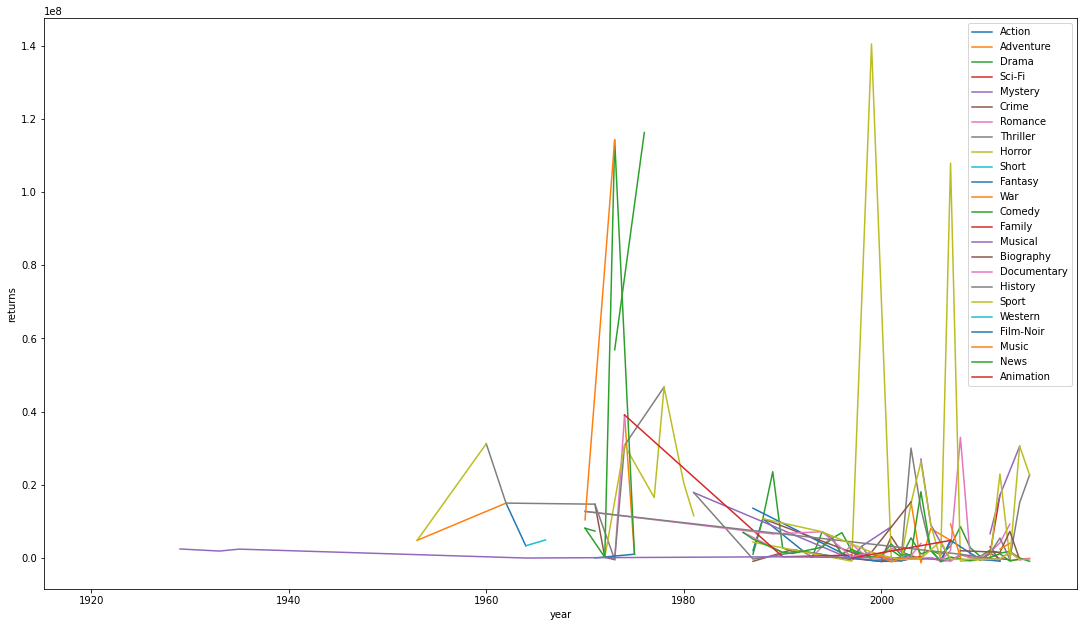

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
g.sort_values(by="Year")
#Plot line for every graph
for x in genres:
    ax.plot(g[g.Genre==x].Year,g[g.Genre==x].Returns,label=x)
ax.set_xlabel("year")
ax.set_ylabel("returns")
ax.legend(loc='best')
fig.set_size_inches(18.5, 10.5)




After this I plotted a graph to visualise all the genres in terms of their returns per year. This allowed me to see that some genres such as comedy had been very popular during times like the 70s but are not as profitable anymore. Therefore I decided to focus on genres that had been the most popular in the last decade.

,index,Genre,Year,Returns
0,312,Mystery,2014.0,3.053732e+07
1,266,Horror,2014.0,3.053732e+07
2,264,Horror,2012.0,2.295311e+07
3,428,Thriller,2015.0,2.265782e+07
4,267,Horror,2015.0,2.265782e+07
...,...,...,...,...
74,379,Sci-Fi,2013.0,NaN
75,380,Sci-Fi,2014.0,NaN
76,398,Sport,2016.0,NaN
77,446,Western,2014.0,NaN


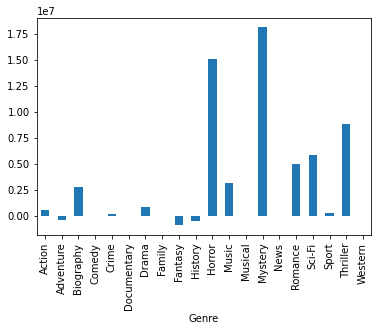

In [ ]:
#Plot genres from 2010 in descending return
g = g[g.Year>2010.00].sort_values(by="Returns", ascending=False)
g.groupby("Genre")["Returns"].mean().plot(kind="bar")
g.reset_index()


In [ ]:
genres_years[(genres_years["Year"]>2010)&((genres_years["Genre"]=="Thriller")|(genres_years["Genre"]=="Horror")|(genres_years["Genre"]=="Mystery"))].dropna().sort_values(by="Returns",ascending=False)

,Year,Genre,Returns,Budget,Movie_title
231,2012.0,Horror,52245055.0,1000000.0,The Devil Inside
210,2014.0,Mystery,30537320.0,1000000.0,Unfriended
211,2014.0,Thriller,30537320.0,1000000.0,Unfriended
209,2014.0,Horror,30537320.0,1000000.0,Unfriended
880,2015.0,Thriller,22657819.0,100000.0,The Gallows
879,2015.0,Horror,22657819.0,100000.0,The Gallows
218,2012.0,Horror,17112929.0,1000000.0,Chernobyl Diaries
219,2012.0,Mystery,17112929.0,1000000.0,Chernobyl Diaries
221,2012.0,Thriller,17112929.0,1000000.0,Chernobyl Diaries
417,2011.0,Mystery,6598492.0,500000.0,A Separation


From the graph I found horror, thriller and mystery to be the ones who had generated the most profit and therefore I decided to look at then individually to see if the average profit may have been influenced by a really good year.

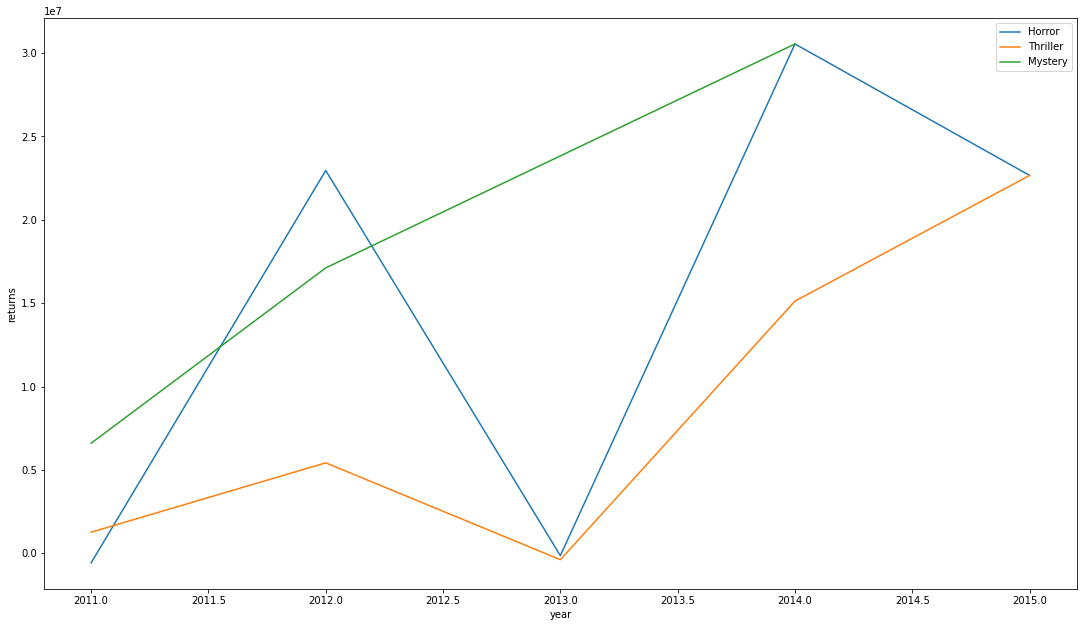

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
genres = ["Horror","Thriller","Mystery"]
g = g.sort_values(by = "Year")
#plot line for each genre
for x in genres:
    ax.plot(g[g.Genre==x].dropna().Year,g[g.Genre==x].dropna().Returns,label=x)
ax.set_xlabel("year")
ax.set_ylabel("returns")
ax.legend(loc='best')
fig.set_size_inches(18.5, 10.5)

From the previous graph it can be said there is a trend in Thriller movies gaining more returns recently. The same could be said about horror movies but its more risky as they were making high returns in 2012 before decreasing dramatically low in 2013, therefore this pattern may repeat. On the other hand mystery movies don't seem to have had bad years recently, so they may be the saftest bet.
A combination of the three may be worth looking into as the results show this worked previously, but it is hard to clearly conclude this as there are only 4 films.

In [ ]:
df[df["genres"]=="Horror|Mystery|Thriller"].sort_values(by="title_year")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,return
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,422432,1885,John Gavin,2.0,money|motel|rain|shower|theft,http://www.imdb.com/title/tt0054215/?ref_=fn_t...,1040.0,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000,31193053.0
4475,Color,Steve Miner,242.0,87.0,49.0,59.0,Adrienne King,309.0,19100000.0,Horror|Mystery|Thriller,Betsy Palmer,Friday the 13th Part 2,39690,707,Amy Steel,0.0,ice pick|jason voorhees|lake|pitchfork|shack,http://www.imdb.com/title/tt0082418/?ref_=fn_t...,394.0,English,USA,R,1250000.0,1981.0,121.0,6.1,1.85,0,17850000.0
4485,Color,James Wan,287.0,103.0,0.0,651.0,Monica Potter,2000.0,55153403.0,Horror|Mystery|Thriller,Michael Emerson,Saw,299127,5161,Shawnee Smith,0.0,chained|flashback|killer|serial killer|surpris...,http://www.imdb.com/title/tt0387564/?ref_=fn_t...,1509.0,English,USA,R,1200000.0,2004.0,878.0,7.7,1.85,0,53953403.0
4534,Color,Levan Gabriadze,270.0,83.0,6.0,142.0,Renee Olstead,707.0,31537320.0,Horror|Mystery|Thriller,Shelley Hennig,Unfriended,44329,1565,Heather Sossaman,0.0,blender|computer screen|secret|skype|webcam,http://www.imdb.com/title/tt3713166/?ref_=fn_t...,309.0,English,USA,R,1000000.0,2014.0,305.0,5.7,1.85,13000,30537320.0


If we look at movies with these three genres, then all of them generated a good profit, but it is important to note only only two of them were produced in the last 20 years.
With them all being made in the USA with English as their language.

Drawing back to the research done earlier with countries, I have decided to look at whether western movies would ensure good returns. Whilst there are no losses, I do not think the data is enough to conclude this as there are too many missing values and it is also visible returns in 2007 are way lower in comparison to 1964 and 1966.

In [ ]:
genres_years[genres_years["Genre"]=="Western"]

,Year,Genre,Returns,Budget,Movie_title
84,1968.0,Western,NaN,1455000.0,Shalako
95,1982.0,Western,NaN,1250000.0,The Ballad of Gregorio Cortez
153,1966.0,Western,4900000.0,1200000.0,"The Good, the Bad and the Ugly"
237,1956.0,Western,NaN,1000000.0,Love Me Tender
359,2014.0,Western,NaN,1000000.0,Doc Holliday's Revenge
465,1952.0,Western,NaN,750000.0,High Noon
781,2015.0,Western,NaN,250000.0,Western Religion
797,1964.0,Western,3300000.0,200000.0,A Fistful of Dollars
957,2007.0,Western,213768.0,30000.0,The Legend of God's Gun


# Summary



I looked into  the imdb database to look for what kind of movies would generate good returns.
To do this I first did an overview of the dataset and then I looked into specific variables, as the country where the movie was from or what genres have been doing well in the past decade.
I started by looking into which variables could define good success. My initial hypothesis was that a good score would mean the movie was good and therefore would make more money, this was proved wrong as there seemed to be no relationship between the IMDB score and  returns of the movie therefore  I chose to focus on looking at movies with higher returns rather than on movies with a higher score. In future as an alternative it would be good to look at number of users that reviewed the film as that had a good correlation with returns.
I examined whether there was a specific country which would produce movies with higher returns. The USA showed the highest returns even though the higher ones were outliers. Whilst Italy did show a good average return I do not think there is enough evidence to claim that a movie there would be successful. This is as all the movies that met the budget criteria came out too long ago, they were also of western genre. Whilst there isn't sufficient data to claim this genre is still good, there was some data that tells us they are still profitable but nowhere near as much as they were before.

Based on the data analysis, I could recommend that the studio pursue making a film in the genre of mystery, thriller or horror, or some combination of both. However even though these type of films seem to always make even a small profit, they have shown to have had lower returns some years. I would make the film in the USA and in English as this is what other films which made a profit and meet the criteria for budget have done.